In [412]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
from scipy import stats
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import cv2
import numpy as np
import PIL
from PIL import Image, ImageChops, ImageDraw
from IPython.display import display
from skimage import io, img_as_float

# Step 1
Load data

In [413]:
with uproot.open('toyForStudents_5.root') as datafile:
    data_df = datafile['R0Tree'].arrays(library='pd')

# Step 2
First data look

In [414]:
df = pd.DataFrame(data_df)
df

,x,y,id,sample
0,3.460569,0.673391,1,1
1,3.075171,0.761314,1,1
2,2.746258,1.339751,1,1
3,2.190463,2.049242,1,1
4,3.988466,0.707543,1,1
...,...,...,...,...
3399995,3.656641,0.730766,-1,17
3399996,5.113425,0.666245,-1,17
3399997,2.826508,1.441562,-1,17
3399998,3.683099,1.125471,-1,17


In [415]:
df_id_minus_1 = df[df['id'] == -1]
df_id_1 = df[df['id'] == 1]

In [416]:
df_id_minus_1

,x,y,id,sample
1700000,3.524324,2.084737,-1,1
1700001,3.497870,1.261757,-1,1
1700002,2.418601,1.440717,-1,1
1700003,3.495933,1.956262,-1,1
1700004,2.284854,2.110827,-1,1
...,...,...,...,...
3399995,3.656641,0.730766,-1,17
3399996,5.113425,0.666245,-1,17
3399997,2.826508,1.441562,-1,17
3399998,3.683099,1.125471,-1,17


In [417]:
df_id_1

,x,y,id,sample
0,3.460569,0.673391,1,1
1,3.075171,0.761314,1,1
2,2.746258,1.339751,1,1
3,2.190463,2.049242,1,1
4,3.988466,0.707543,1,1
...,...,...,...,...
1699995,2.924093,1.452403,1,17
1699996,2.067248,1.737031,1,17
1699997,2.581711,1.004430,1,17
1699998,4.302710,1.388870,1,17


In [418]:
def print_images():
    grouped_minus_1 = df_id_minus_1.groupby('sample')
    grouped_1 = df_id_1.groupby('sample')

    for sample, group_minus_1 in grouped_minus_1:
        group_1 = grouped_1.get_group(sample)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # DLA id = -1
        axs[0].scatter(group_minus_1['x'], group_minus_1['y'], label='id = -1', color='blue', marker=',', s=1)
        axs[0].set_title(f'Obrazek dla sample {sample} (id = -1)')
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].legend()

        # DLA id = 1
        axs[1].scatter(group_1['x'], group_1['y'], label='id = 1', color='red', marker=",", s=1)
        axs[1].set_title(f'Obrazek dla sample {sample} (id = 1)')
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('y')
        axs[1].legend()

        plt.tight_layout()
        plt.show()


# Step 3
Plots, interpolated

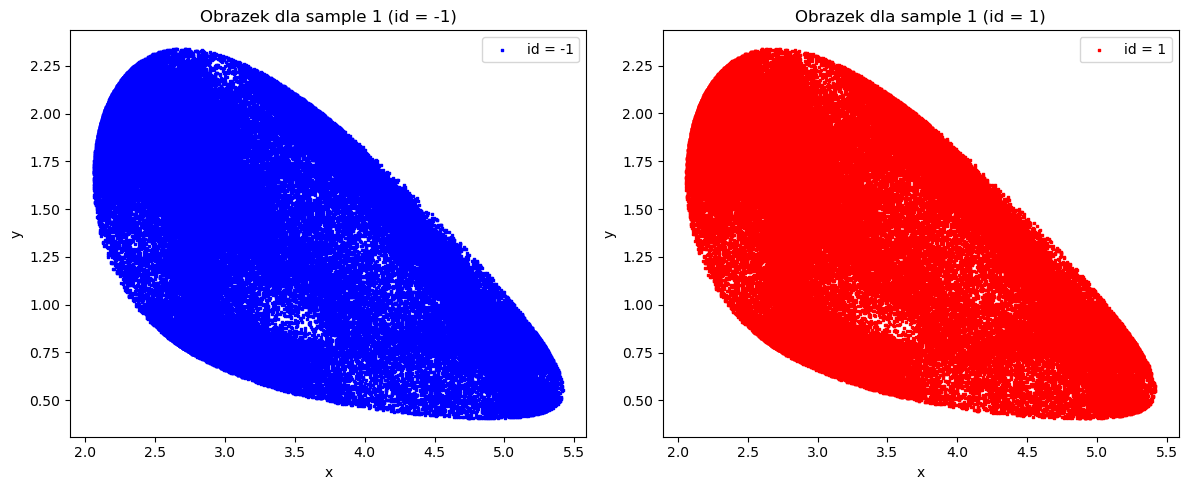

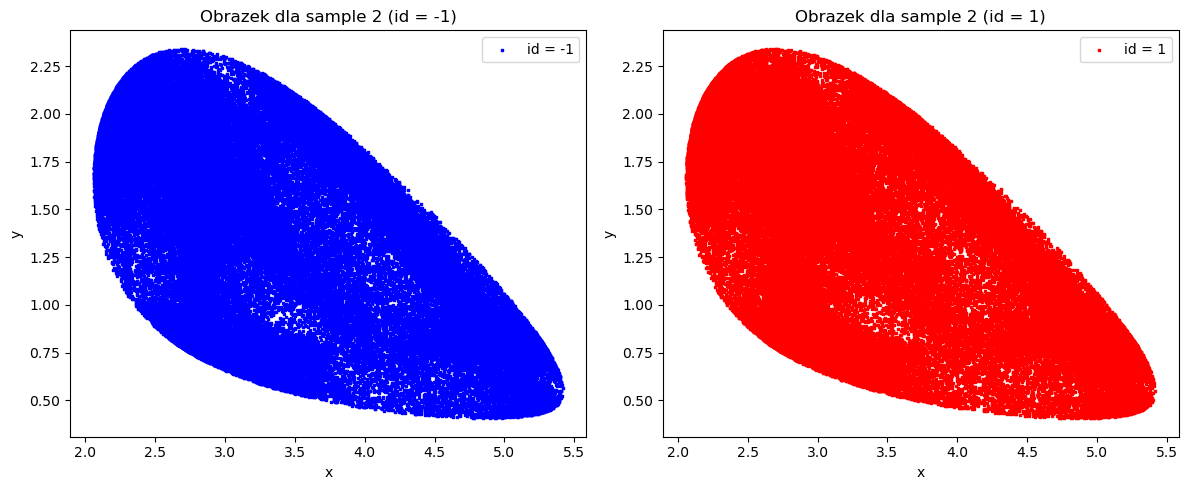

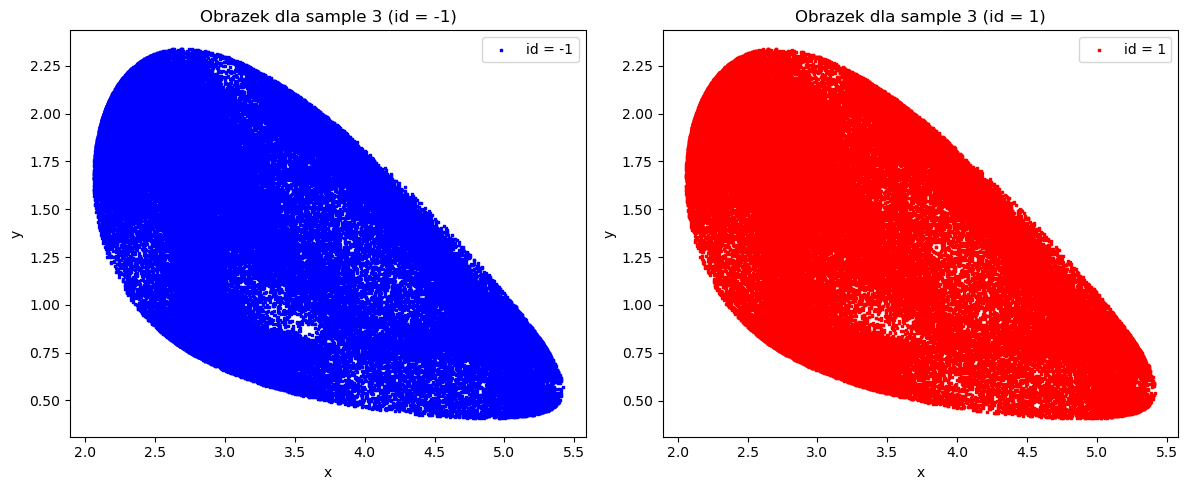

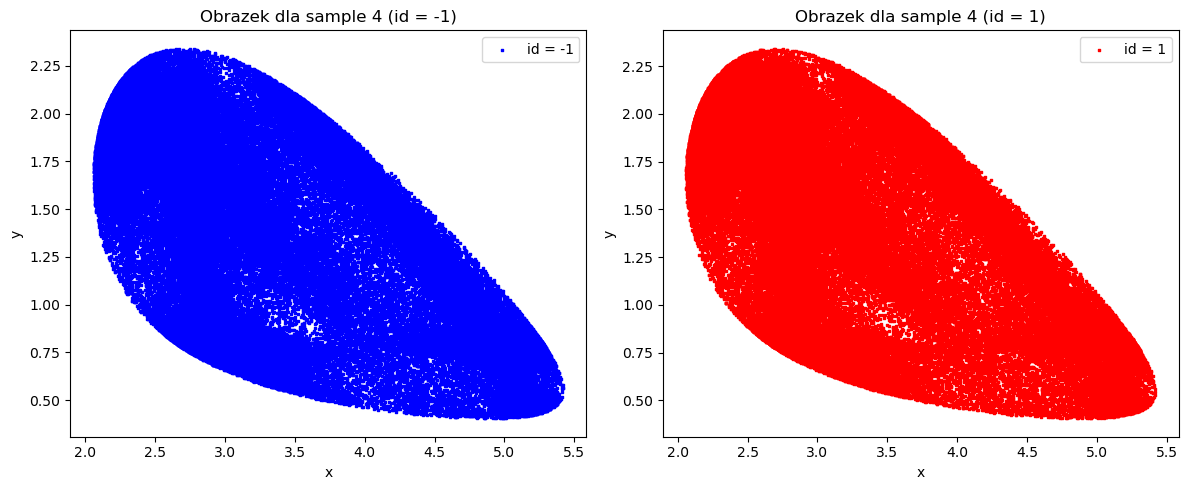

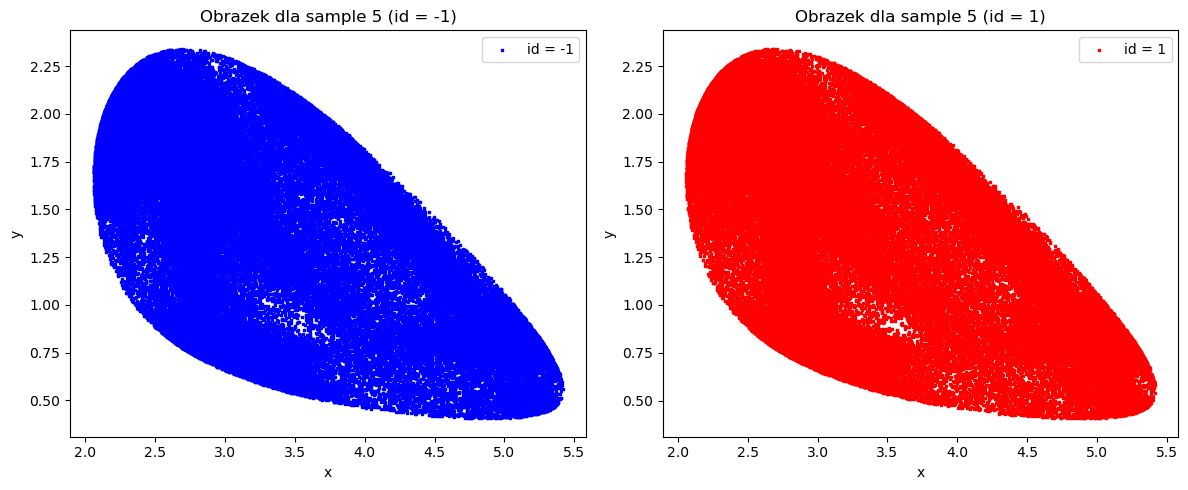

KeyboardInterrupt: 

In [419]:
print_images()

# Step 4
Save cloud points as png files to get exact images

In [ ]:
def get_model_training_images(sample):
    data_id_minus_1 = df_id_minus_1[(df_id_minus_1['sample'] == sample) & (df_id_minus_1['id'] == -1)]
    data_id_1 = df_id_1[(df_id_1['sample'] == sample) & (df_id_1['id'] == 1)]

    return data_id_minus_1, data_id_1

In [ ]:
a, b = get_model_training_images(17)

In [ ]:
a

,x,y,id,sample
3300000,3.140368,2.036576,-1,17
3300001,3.498585,0.740953,-1,17
3300002,3.234064,1.930019,-1,17
3300003,2.658791,0.798944,-1,17
3300004,3.423107,2.123055,-1,17
...,...,...,...,...
3399995,3.656641,0.730766,-1,17
3399996,5.113425,0.666245,-1,17
3399997,2.826508,1.441562,-1,17
3399998,3.683099,1.125471,-1,17


In [ ]:
b

,x,y,id,sample
1600000,4.465685,0.796268,1,17
1600001,4.763283,0.922533,1,17
1600002,2.679387,1.167562,1,17
1600003,3.276646,1.320163,1,17
1600004,3.004393,1.491962,1,17
...,...,...,...,...
1699995,2.924093,1.452403,1,17
1699996,2.067248,1.737031,1,17
1699997,2.581711,1.004430,1,17
1699998,4.302710,1.388870,1,17


In [ ]:
# def save_point_cloud_as_image(dataframe, filename):
#     width = 500
#     height = 500

#     min_x = dataframe['x'].min()
#     max_x = dataframe['x'].max()
#     min_y = dataframe['y'].min()
#     max_y = dataframe['y'].max()

#     image = Image.new("RGB", (width, height), "white")
#     draw = ImageDraw.Draw(image)

#     for _, row in dataframe.iterrows():
#         x = int((row['x'] - min_x) / (max_x - min_x) * width)
#         y = int((row['y'] - min_y) / (max_y - min_y) * height)
#         draw.point((x, y), fill="black")

#     image.save(filename)

def save_point_cloud_as_image(dataframe, filename):
    width = 1000
    height = 1000
    padding = 5

    min_x = dataframe['x'].min()
    max_x = dataframe['x'].max()
    min_y = dataframe['y'].min()
    max_y = dataframe['y'].max()
    
    x_scale = (width - 2 * padding) / (max_x - min_x)
    y_scale = (height - 2 * padding) / (max_y - min_y)

    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    for _, row in dataframe.iterrows():
        x = int((row['x'] - min_x) * x_scale) + padding
        y = int((row['y'] - min_y) * y_scale) + padding
        draw.point((x, height - y - 1), fill="black")  # Invert y to match image coordinates

    image.save(filename)


In [ ]:
for i in range(1, 2, 1):
    print(f"========== SAMPLE {i} ==========")
    img_minus, img = get_model_training_images(i)
    save_point_cloud_as_image(img_minus, f"cloud_points_to_images_minus/img_minus_{i}.png")
    save_point_cloud_as_image(img, f"cloud_points_to_images/img_{i}.png")
    print(f"Sample {i} saved to cloud_points_to_images/ folder.")
print(f"================================")
print("Conversion done.")

========== SAMPLE 1 ==========
Sample 1 saved to cloud_points_to_images/ folder.
Conversion done.


# Step 5
Cluster analysis
https://scikit-learn.org/stable/modules/clustering.html

## PIL library

In [ ]:
def PIL_diff(img1, img2):
    diff = ImageChops.difference(img1, img2)
    if diff.getbbox():
        # yellow_bg = Image.new("RGB", diff.size, "yellow")
        # result = ImageChops.add(yellow_bg, diff)
        # display(result)
        display(diff)
    else:
        print("No differences")

In [ ]:
def load_image_from_folder(folder, filename):
    path = f"{folder}/{filename}"
    return Image.open(path)

img_minus_1_loaded = load_image_from_folder("cloud_points_to_images_minus", "img_minus_1.png")
img_1_loaded = load_image_from_folder("cloud_points_to_images", "img_1.png")

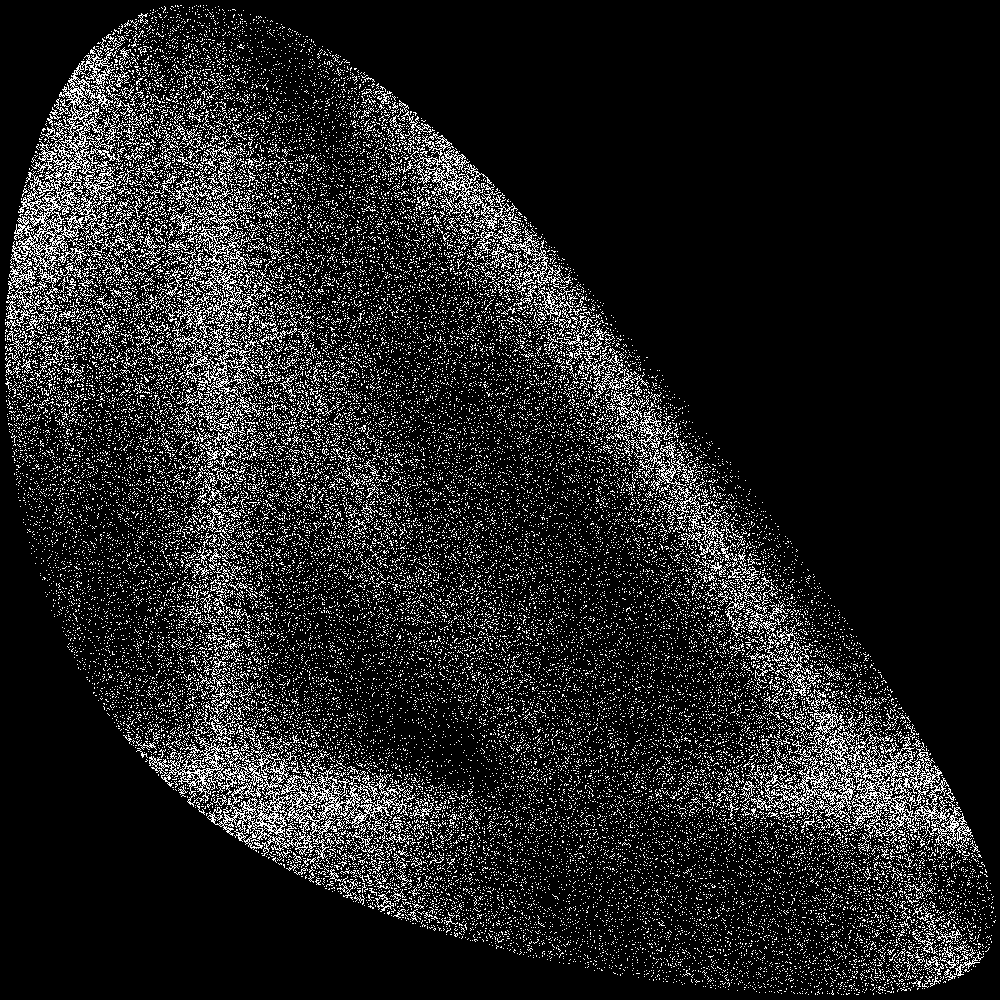

In [ ]:
PIL_diff(img_minus_1_loaded, img_1_loaded)

## TESTS FOR PILL LIB METHOD DIFF

In [ ]:
x_coordinates = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 15, 25, 35]
y_coordinates = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 15, 25, 35]

df1 = pd.DataFrame({
    'x': x_coordinates,
    'y': y_coordinates,
    'id': 1,
    'sample': 1
})

x_coordinates = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 55, 65, 75]
y_coordinates = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 55, 65, 75]

df2 = pd.DataFrame({
    'x': x_coordinates,
    'y': y_coordinates,
    'id': -1,
    'sample': -1
})

df_test = pd.concat([df1, df2], ignore_index=True)
#df

In [ ]:
df_id_minus_1_test = df_test[df_test['id'] == -1]
df_id_1_test = df_test[df_test['id'] == 1]


In [ ]:
def print_images2():

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # DLA id = -1
    axs[0].scatter(df_id_minus_1_test['x'], df_id_minus_1_test['y'], label='id = -1', color='blue', marker=',', s=10)
    axs[0].set_title(f'Obrazek dla sample (id = -1)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].legend()

    # DLA id = 1
    axs[1].scatter(df_id_1_test['x'], df_id_1_test['y'], label='id = 1', color='red', marker=",", s=10)
    axs[1].set_title(f'Obrazek dla sample (id = 1)')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


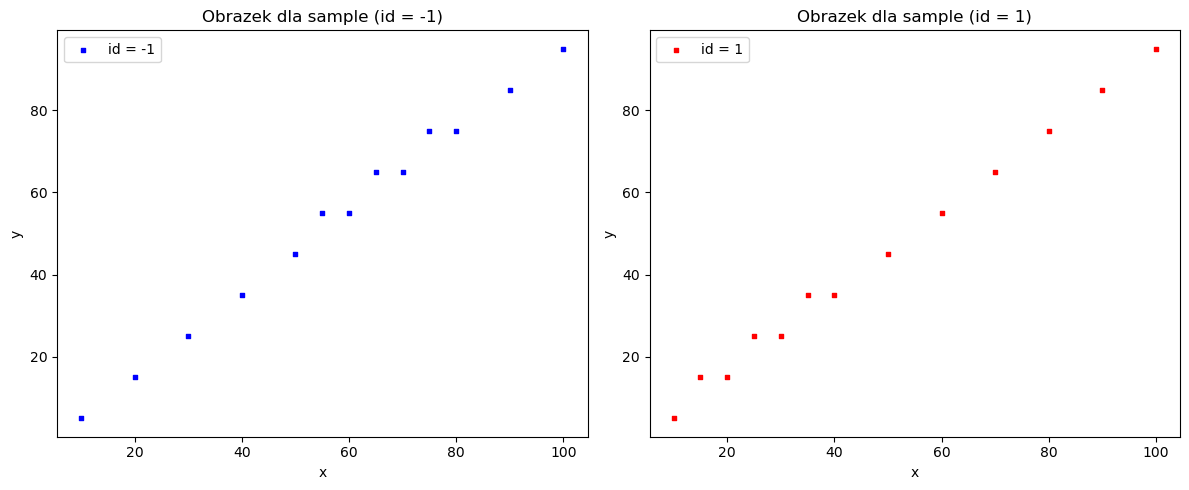

In [ ]:
print_images2()

In [ ]:
def get_model_training_images():
    data_id_minus_1 = df_id_minus_1_test[(df_id_minus_1_test['sample']) & (df_id_minus_1_test['id'] == -1)]
    data_id_1 = df_id_1_test[(df_id_1_test['sample']) & (df_id_1_test['id'] == 1)]

    return data_id_minus_1, data_id_1

img_minus, img = get_model_training_images()
save_point_cloud_as_image(img_minus, f"test/img_minus_1.png")
save_point_cloud_as_image(img, f"test/img_1.png")
print(f"================================")
print("Conversion done.")


save_point_cloud_as_image(img_minus, f"test/img_minus_1.png")
save_point_cloud_as_image(img, f"test/img_1.png")


Conversion done.


In [ ]:
img_test_minus_1 = load_image_from_folder("test", "img_minus_1.png")
img_test_1 = load_image_from_folder("test", "img_1.png")

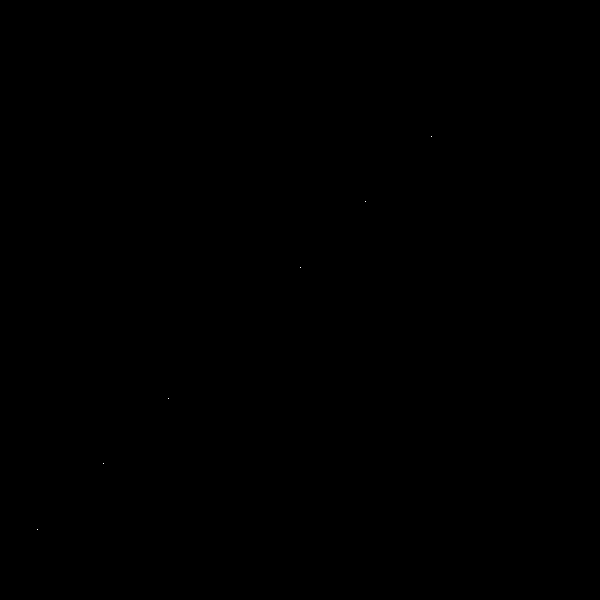

In [ ]:
PIL_diff(img_test_minus_1, img_test_1)

In [ ]:
df_id_minus_1 = df[df['id'] == -1]
df_id_minus_1
grouped_minus_1 = df_id_minus_1[df_id_minus_1['sample'] == 1]
grouped_minus_1
# grouped_minus_1 = df_id_minus_1.groupby('sample')
# grouped_minus_1
# grouped_minus_1_s_1 = grouped_minus_1['sample'] == 1
# grouped_minus_1_s_1

,x,y,id,sample
1700000,3.524324,2.084737,-1,1
1700001,3.497870,1.261757,-1,1
1700002,2.418601,1.440717,-1,1
1700003,3.495933,1.956262,-1,1
1700004,2.284854,2.110827,-1,1
...,...,...,...,...
1799995,4.818124,0.807776,-1,1
1799996,4.082955,0.873010,-1,1
1799997,5.049155,0.740994,-1,1
1799998,3.069079,1.227595,-1,1


In [ ]:
img = cv2.imread('cloud_points_to_images_minus/img_minus_1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Przygotuj dane
# points = img_gray.reshape((-1, 1))
# print(points)
threshold = 200  # Próg binaryzacji
points = np.where(img_gray == 0)

# Zapisz współrzędne punktów jako tablicę (x, y)
coordinates = np.column_stack((points[1], points[0]))
df_coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])
# print(df_coordinates)
df_coordinates

,x,y
0,701,5
1,778,5
2,790,5
3,818,5
4,713,6
...,...,...
98896,3359,3993
98897,3383,3993
98898,3279,3994
98899,3341,3994


## K-Means

In [ ]:
def detect_image_differences(img1, img2, num_clusters=2):
    img1_array = img_as_float(img1)
    img2_array = img_as_float(img2)

    img1_flat = img1_array.reshape((-1, 3))
    img2_flat = img2_array.reshape((-1, 3))
    print(img1_flat)

    img = cv2.imread('cloud_points_to_images_minus/img_minus_1.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # points = img_gray.reshape((-1, 1))
    # print(points)
    points = np.where(img_gray == 0)

    coordinates = np.column_stack((points[1], points[0]))
    df_coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])

    img2 = cv2.imread('cloud_points_to_images/img_1.png')
    img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # points = img_gray.reshape((-1, 1))
    # print(points)
    points2 = np.where(img_gray2 == 0)

    coordinates2 = np.column_stack((points2[1], points2[0]))
    df_coordinates2 = pd.DataFrame(coordinates2, columns=['x', 'y'])
    # print(df_coordinates)
    # distortions = []

    # for num_clusters in range(1, max_clusters + 1):
    #     kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    #     kmeans.fit(img1_flat)
    #     distortions.append(kmeans.inertia_)

    combined_data = np.vstack((df_coordinates, df_coordinates2))

    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 30)

    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df_coordinates)
        kmeanModel.fit(df_coordinates)

        # distortions
        distortions.append(sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_coordinates.shape[0])

        # inertias
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_coordinates.shape[0]
        mapping2[k] = kmeanModel.inertia_

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

    num_clusters = num_clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(combined_data)

    # labels = kmeans.labels_

    img1_labels = labels[:img1_flat.shape[0]]
    img2_labels = labels[img1_flat.shape[0]:]
 

    # Sprawdzenie, czy każdy punkt należy do innego klastra w df_coordinates i df_coordinates2
    df_coordinates['cluster'] = labels[:len(df_coordinates)]
    df_coordinates2['cluster'] = labels[len(df_coordinates):]

    combined_data_clusters = np.vstack((df_coordinates, df_coordinates2))
    combined_data_clusters = pd.DataFrame(combined_data_clusters, columns=['x', 'y', 'cluster'])

    # kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    # labels1 = kmeans.fit_predict(df_coordinates)
    # labels2 = kmeans.predict(df_coordinates2)
    # print(labels1)
    # differences = labels1 != labels2

    # print(differences)

    # Konwersja różnic z powrotem na wymiary obrazu
    # differences_img = differences.reshape(img_gray.shape)
    # differences_indices = np.where(labels1 != labels2)[0]
    # differences_coordinates = df_coordinates.iloc[differences_indices]
    # df_coordinates['cluster'] = labels1
    # df_coordinates2['cluster'] = labels2

    print(df_coordinates)

    differences_coordinates = df_coordinates[df_coordinates['cluster'] == df_coordinates['cluster']]
    diff_xy = differences_coordinates[['x', 'y']]

    plt.figure(figsize=(8, 6))
    for cluster in range(num_clusters):
        cluster_points = combined_data_clusters[combined_data_clusters['cluster'] == cluster]
        plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster}', alpha=0.5, s=1)
        # plt.scatter(differences_coordinates['x'], differences_coordinates['y'], color='red', label='Different Clusters', s=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Clusters with Different Clusters Highlighted')
    plt.legend()

    # plt.figure(figsize=(8, 6))
    # for cluster in range(num_clusters):
    #     cluster_points = df_coordinates2[df_coordinates2['cluster'] == cluster]
    #     plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster}', alpha=0.5, s=1)
    # # plt.scatter(differences_coordinates['x'], differences_coordinates['y'], color='red', label='Different Clusters', s=1)
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.title('Clusters with Different Clusters Highlighted')
    # plt.legend()
    plt.show()

    # print(differences_coordinates)
    return diff_xy

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


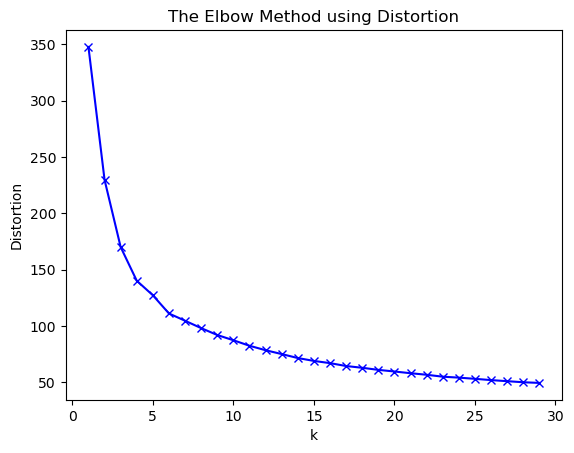

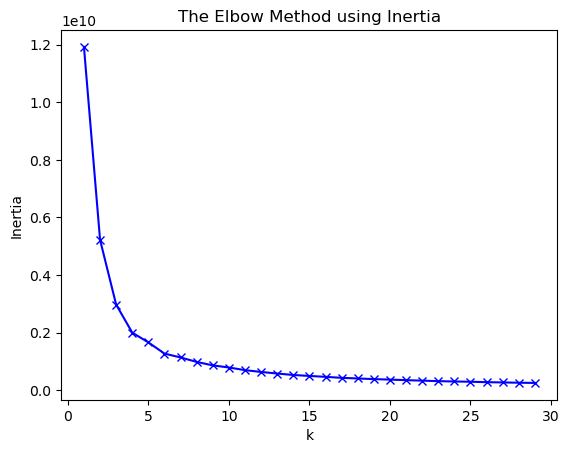

         x    y  cluster
0      177    5        5
1      180    5        5
2      196    5        5
3      200    5        5
4      206    5        5
...    ...  ...      ...
85429  832  994        9
85430  837  994        9
85431  841  994        9
85432  843  994        9
85433  858  994        9

[85434 rows x 3 columns]


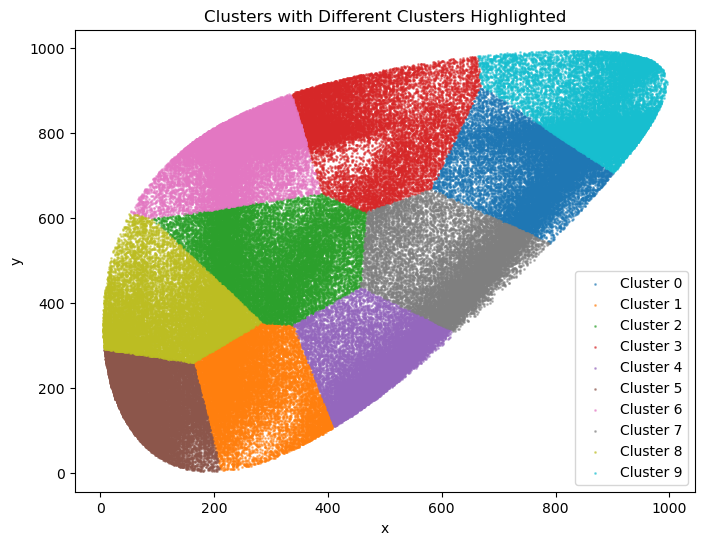

In [ ]:
differences_img = detect_image_differences(img_minus_1_loaded, img_1_loaded, 10)

save_point_cloud_as_image(differences_img, "test_differences.png")

# io.imshow(differences_img, cmap='gray')
# io.show()

In [ ]:



from sklearn.cluster import KMeans
import numpy as np

# Przyjęty wektor punktów
points = np.array([[1, 2], [3, 4], [1, 2], [5, 6], [3, 4], [7, 8], [9, 10], [5, 6], [1, 2], [11, 12], [13, 14], [0, 0], [0, 0], [1, 1]])

# Klasteryzacja punktów
kmeans = KMeans(n_clusters=2)  # Wybierz odpowiednią liczbę klastrów
labels = kmeans.fit_predict(points)

# Przypisanie powtarzającym się punktom tę samą etykietę klastra
unique_points, unique_indices = np.unique(points, axis=0, return_index=True)
unique_labels = labels[unique_indices]

# Przypisanie pozostałym punktom różnych etykiet klastrów
remaining_indices = np.setdiff1d(np.arange(len(points)), unique_indices)
remaining_labels = np.max(unique_labels) + 1
labels[remaining_indices] = remaining_labels

# Zwracanie punktów wraz z etykietami klastrów
points_with_labels = np.column_stack((points, labels))
print("Punkty wraz z przyporządkowanymi klastrami:")
print(points_with_labels)


Punkty wraz z przyporządkowanymi klastrami:
[[ 1  2  0]
 [ 3  4  0]
 [ 1  2  2]
 [ 5  6  0]
 [ 3  4  2]
 [ 7  8  1]
 [ 9 10  1]
 [ 5  6  2]
 [ 1  2  2]
 [11 12  1]
 [13 14  1]
 [ 0  0  0]
 [ 0  0  2]
 [ 1  1  0]]


c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### SECOND APPROACH (BIG IMAGE, collect all black points as pixels from image and calculate elbow method)

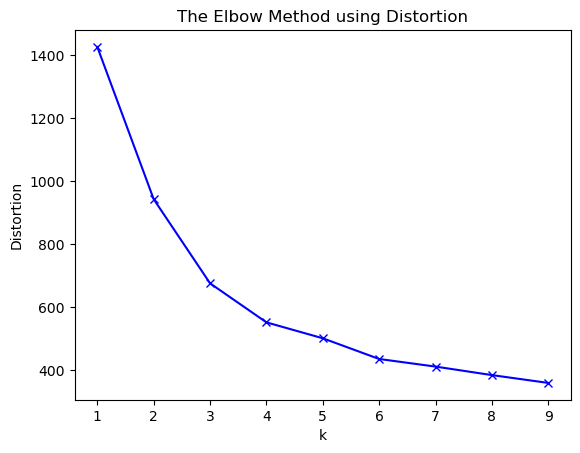

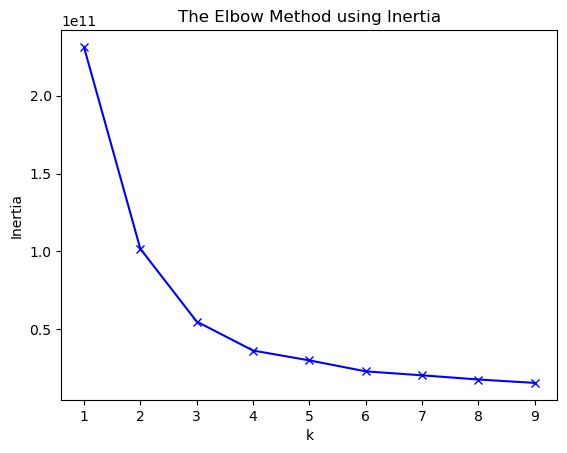

c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


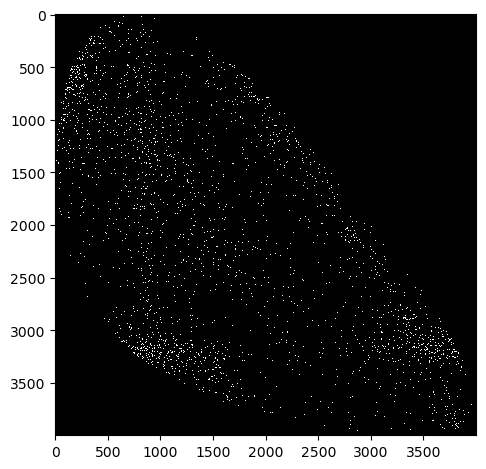

In [ ]:
differences_img = detect_image_differences(img_1_loaded, img_minus_1_loaded, 5)

io.imshow(differences_img, cmap='gray')
io.show()

## FIRST APPROACH

c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\mic

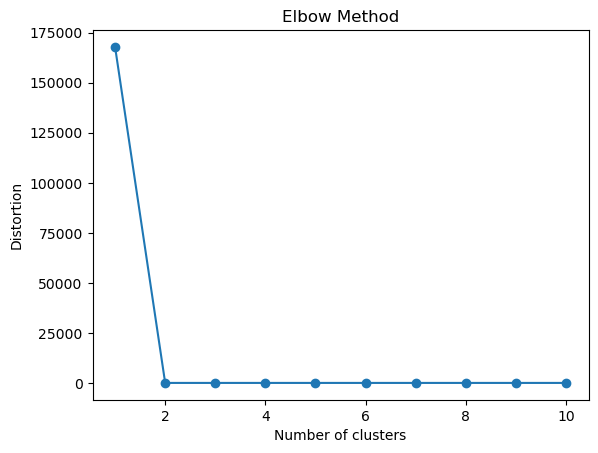

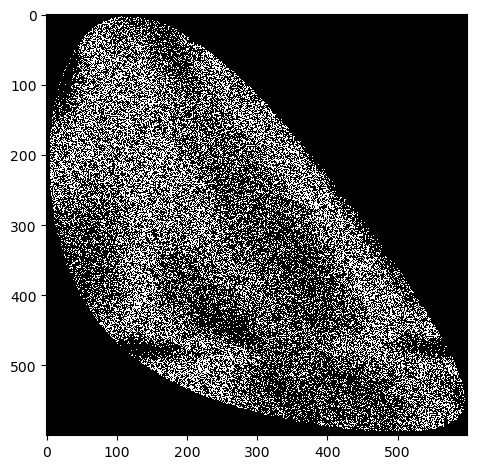

In [ ]:
differences_img = detect_image_differences(img_1_loaded, img_minus_1_loaded)

io.imshow(differences_img, cmap='gray')
io.show()

In [420]:
def kmeans_image_diff(img1, img2, plot_flag, num_clusters=10):
    img1_array = np.array(img1)
    img2_array = np.array(img2)

    img1_flat = img1_array.reshape((-1, 3))
    img2_flat = img2_array.reshape((-1, 3))

    combined_data = np.vstack((img1_flat, img2_flat))

    distortions = []
    for i in range(1, num_clusters + 1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(img1_flat) # combined_data ???
        distortions.append(kmeans.inertia_)

    optimal_num_clusters = 1
    for i in range(1, num_clusters - 1):
        if (distortions[i] - distortions[i + 1]) / distortions[i] < 0.05:
            optimal_num_clusters = i + 1
            break
    if plot_flag == True:
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, num_clusters + 1), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.title('Elbow Method')
        # plt.xticks(range(1, num_clusters + 1))
        # plt.grid(True)
        plt.show()

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(combined_data)

    labels = kmeans.labels_

    img1_labels = labels[:img1_flat.shape[0]]
    img2_labels = labels[img1_flat.shape[0]:]

    height, width, _ = img1_array.shape

    diff_img = Image.new('RGB', (width, height), (255, 255, 255))
    diff_pixels = diff_img.load()
    diff_img_gray = Image.new('RGB', (width, height), (255, 255, 255))
    diff_pixels_gray = diff_img_gray.load()

    for i in range(len(img1_labels)):
        if img1_labels[i] != img2_labels[i]:
            x = i % width
            y = i // width
            diff_pixels_gray[x, y] = (0, 0, 0)  # Czarny - róznice z img_1 i img_2
            if img1_labels[i] == 0:
                diff_pixels[x, y] = (255, 0, 0)  # Czerwony - piksel występuje tylko w img_2
            else:
                diff_pixels[x, y] = (0, 0, 255)  # Niebieski - piksel występuje tylko w img_1

    return diff_img, diff_img_gray, optimal_num_clusters

c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\mic

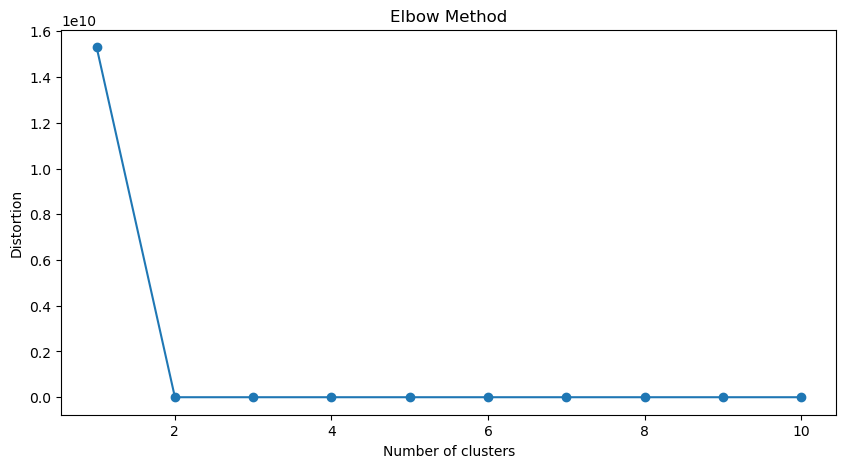

c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Optimal number of clusters = 2


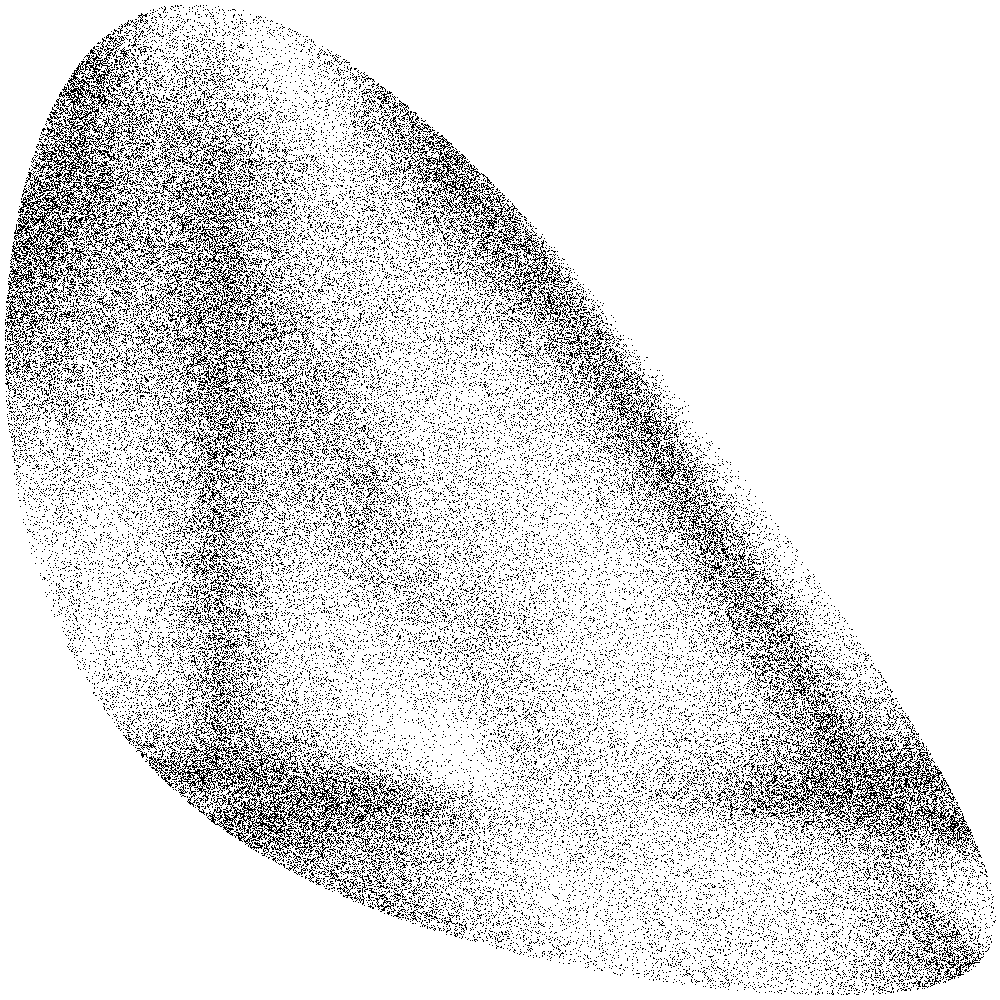

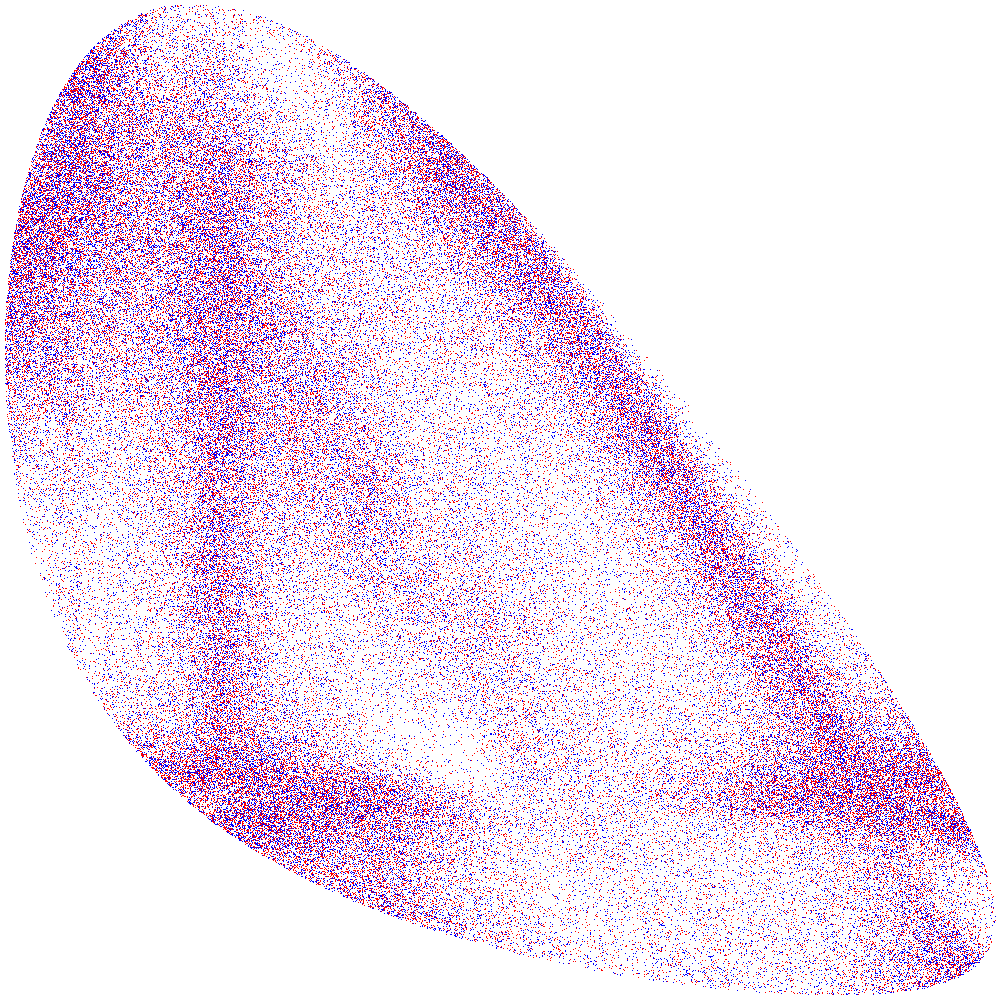

In [421]:
differences_image, differences_image_gray, optimal_num_clusters = kmeans_image_diff(img1=img_1_loaded, img2=img_minus_1_loaded, plot_flag=True, num_clusters=10)
print(f"Optimal number of clusters = {optimal_num_clusters}")
display(differences_image_gray)
display(differences_image)

In [ ]:
def t_test(img1, img2, num_clusters=10):
    _, _, distortions_img1 = kmeans_image_diff(img1=img_1_loaded, img2=img_minus_1_loaded, plot_flag=False, num_clusters=10)
    _, _, distortions_img2 = kmeans_image_diff(img1=img_1_loaded, img2=img_minus_1_loaded, plot_flag=False, num_clusters=10)  # dla drugiego obrazu używamy tego samego

    t_statistic, p_value = stats.ttest_ind(distortions_img1, distortions_img2, equal_var=False)

    return t_statistic, p_value

t_stat, p_val = t_test(img_1_loaded, img_minus_1_loaded)
print("Statystyka t:", t_stat)
print("Wartość p:", p_val)


c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\mic

Statystyka t: nan
Wartość p: nan


c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:

# Aby wykonać test t-Studenta na podstawie wyników z funkcji kmeans_image_diff, najpierw należy zdefiniować zmienną losową, którą chcemy porównać pomiędzy dwoma grupami. W tym przypadku moglibyśmy rozważyć średnią wartość dystorsji (distortion) dla każdego obrazu jako taką zmienną. Następnie, używając wyników obliczeń dla obu obrazów, można przeprowadzić test t-Studenta, aby sprawdzić, czy istnieją istotne różnice między średnimi wartościami dystorsji dla tych dwóch obrazów.

SyntaxError: invalid syntax (2421769390.py, line 1)